Importing necessary libraries

In [581]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Uploading text file 

In [582]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Setting column name as ID, Revies and Sentiment and arranging data by reading text file imported above

In [583]:
data= pd.read_csv('/content/imdb_labelled.txt', names=['Reviews','Sentiment'], delimiter = '\t')
data.insert(0,'ID',range(0,len(data)))
data

,ID,Reviews,Sentiment
0,0,"A very, very, very slow-moving, aimless movie ...",0
1,1,Not sure who was more lost - the flat characte...,0
2,2,Attempting artiness with black & white and cle...,0
3,3,Very little music or anything to speak of.,0
4,4,The best scene in the movie was when Gerardo i...,1
...,...,...,...
743,743,I just got bored watching Jessice Lange take h...,0
744,744,"Unfortunately, any virtue in this film's produ...",0
745,745,"In a word, it is embarrassing.",0
746,746,Exceptionally bad!,0


Removing all the special characters 

In [584]:
data=data.replace(to_replace = "[^a-zA-Z0-9]",value= " " ,regex=True)
data

,ID,Reviews,Sentiment
0,0,A very very very slow moving aimless movie ...,0
1,1,Not sure who was more lost the flat characte...,0
2,2,Attempting artiness with black white and cle...,0
3,3,Very little music or anything to speak of,0
4,4,The best scene in the movie was when Gerardo i...,1
...,...,...,...
743,743,I just got bored watching Jessice Lange take h...,0
744,744,Unfortunately any virtue in this film s produ...,0
745,745,In a word it is embarrassing,0
746,746,Exceptionally bad,0


Plotting graph using seaborn with sentiments as Positive and and Negative Reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


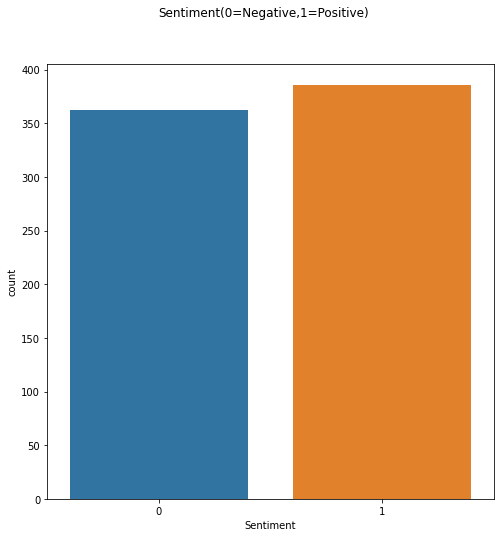

In [585]:
plt.figure(figsize=(8,8))
sns.countplot(data['Sentiment'])
plt.suptitle("Sentiment(0=Negative,1=Positive)")
plt.ylabel("count")
plt.show()

Splitting Train,Test and Development data We have 448 Train set,150 Test Set and 150 Development

---



In [586]:
s1=int(0.6 *len(data))
s2=int(0.7 *len(data))
train_data = data[:s1]


test_data =data[s2:]
dev_data=data[s1:s2]
print("Size of Train data: ",len(train_data))
print("Size of Test data: ",len(test_data))
print("Size of Development data: ",len(dev_data))

Size of Train data:  448
Size of Test data:  225
Size of Development data:  75


Plotting with Train,Test and Develpoment Graph of Negative and Positive Sentiments

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Train_data[(0=Negative , 1=Positive')

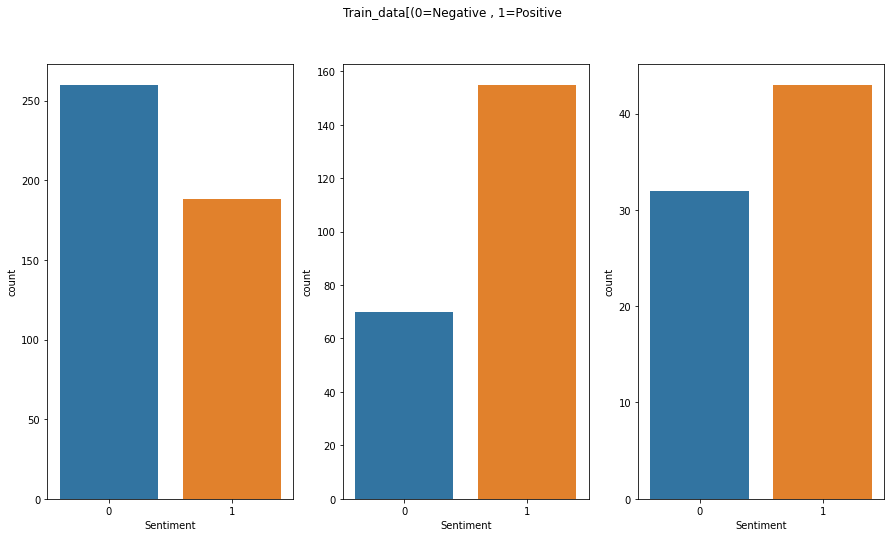

In [587]:
fig,ax = plt.subplots(1,3,figsize = (15,8))
sns.countplot(train_data['Sentiment'],ax=ax[0])
plt.suptitle("Train_data[(0=Negative , 1=Positive")
sns.countplot(test_data['Sentiment'],ax=ax[1])
plt.suptitle("Train_data[(0=Negative , 1=Positive")
sns.countplot(dev_data['Sentiment'],ax=ax[2])
plt.suptitle("Train_data[(0=Negative , 1=Positive")


Now, need to create a  vocabulary list

In [588]:
wordlist=dict()
ID=0
for i in train_data.Reviews:
  ID=ID+1
  for j in i.split():
    j=j.lower()
    if(j in wordlist.keys()):
      wordlist[j].append(ID)

    else:
      wordlist[j] = list()
      wordlist[j].append(ID)

for i in wordlist:
  wordlist[i] = len(set(wordlist[i]))

wordlist


{'a': 158,
 'very': 31,
 'slow': 3,
 'moving': 2,
 'aimless': 1,
 'movie': 85,
 'about': 21,
 'distressed': 1,
 'drifting': 1,
 'young': 3,
 'man': 8,
 'not': 33,
 'sure': 3,
 'who': 21,
 'was': 95,
 'more': 21,
 'lost': 3,
 'the': 220,
 'flat': 2,
 'characters': 19,
 'or': 21,
 'audience': 4,
 'nearly': 1,
 'half': 6,
 'of': 131,
 'whom': 2,
 'walked': 1,
 'out': 27,
 'attempting': 1,
 'artiness': 1,
 'with': 47,
 'black': 7,
 'white': 4,
 'and': 166,
 'clever': 3,
 'camera': 8,
 'angles': 2,
 'disappointed': 5,
 'became': 1,
 'even': 26,
 'ridiculous': 4,
 'as': 40,
 'acting': 21,
 'poor': 5,
 'plot': 18,
 'lines': 5,
 'almost': 8,
 'non': 4,
 'existent': 1,
 'little': 13,
 'music': 6,
 'anything': 5,
 'to': 107,
 'speak': 3,
 'best': 15,
 'scene': 5,
 'in': 81,
 'when': 14,
 'gerardo': 1,
 'is': 133,
 'trying': 3,
 'find': 6,
 'song': 2,
 'that': 77,
 'keeps': 1,
 'running': 1,
 'through': 8,
 'his': 18,
 'head': 3,
 'rest': 4,
 'lacks': 4,
 'art': 7,
 'charm': 2,
 'meaning': 2,
 'i

Function to omit word having count less than 5 

In [589]:
def pop_words(list1):
  for i in list1.copy():
    if i in list1:
      if(list1[i]<=5):
        list1.pop(i)

Now, counting and displaying negative and positive words,

a) Counting Negative words with Sentiment =0 and removing words with 5 or less reviews

In [590]:
negative_words=dict()
ID=0
for i in train_data.Reviews:
  if(train_data.iloc[ID].Sentiment == 0):
    ID=ID+1
    for j in i.split():
      j=j.lower()
      if(j in negative_words.keys()):
        negative_words[j].append(ID)

      else:
        negative_words[j]=list()
        negative_words[j].append(ID)
  else:
    ID=ID+1

for i in negative_words:
  negative_words[i] = len(set(negative_words[i]))

#pop_words(negative_words)
negative_words

{'a': 80,
 'very': 20,
 'slow': 3,
 'moving': 2,
 'aimless': 1,
 'movie': 50,
 'about': 14,
 'distressed': 1,
 'drifting': 1,
 'young': 2,
 'man': 4,
 'not': 28,
 'sure': 3,
 'who': 12,
 'was': 59,
 'more': 9,
 'lost': 1,
 'the': 127,
 'flat': 2,
 'characters': 10,
 'or': 16,
 'audience': 2,
 'nearly': 1,
 'half': 5,
 'of': 71,
 'whom': 2,
 'walked': 1,
 'out': 12,
 'attempting': 1,
 'artiness': 1,
 'with': 28,
 'black': 4,
 'white': 1,
 'and': 78,
 'clever': 2,
 'camera': 4,
 'angles': 1,
 'disappointed': 4,
 'became': 1,
 'even': 22,
 'ridiculous': 4,
 'as': 22,
 'acting': 16,
 'poor': 5,
 'plot': 16,
 'lines': 5,
 'almost': 6,
 'non': 3,
 'existent': 1,
 'little': 11,
 'music': 3,
 'anything': 5,
 'to': 59,
 'speak': 2,
 'rest': 3,
 'lacks': 3,
 'art': 2,
 'charm': 2,
 'meaning': 2,
 'if': 13,
 'it': 68,
 's': 28,
 'emptiness': 1,
 'works': 2,
 'i': 65,
 'guess': 4,
 'because': 12,
 'empty': 1,
 'wasted': 5,
 'two': 3,
 'hours': 3,
 'bit': 3,
 'predictable': 5,
 'had': 7,
 'some': 1

b) Now counting Positive words and Omitting words having reviews less than or equal to 5

In [591]:
positive_words=dict()
ID=0
for i in train_data.Reviews:
  if(train_data.iloc[ID].Sentiment == 1):
    ID=ID+1
    for j in i.split():
      j=j.lower()
      if(j in positive_words.keys()):
        positive_words[j].append(ID)

      else:
        positive_words[j]=list()
        positive_words[j].append(ID)
  else:
    ID=ID+1

for i in positive_words:
  positive_words[i] = len(set(positive_words[i]))

#pop_words(positive_words)
positive_words


{'the': 93,
 'best': 10,
 'scene': 1,
 'in': 37,
 'movie': 35,
 'was': 36,
 'when': 8,
 'gerardo': 1,
 'is': 49,
 'trying': 1,
 'to': 48,
 'find': 4,
 'a': 78,
 'song': 2,
 'that': 31,
 'keeps': 1,
 'running': 1,
 'through': 3,
 'his': 8,
 'head': 1,
 'saw': 4,
 'today': 3,
 'and': 88,
 'thought': 4,
 'it': 57,
 'good': 14,
 'effort': 1,
 'messages': 1,
 'for': 19,
 'kids': 3,
 'loved': 4,
 'casting': 3,
 'of': 60,
 'jimmy': 2,
 'buffet': 1,
 'as': 18,
 'science': 1,
 'teacher': 1,
 'those': 3,
 'baby': 1,
 'owls': 1,
 'were': 10,
 'adorable': 4,
 'showed': 2,
 'lot': 1,
 'florida': 1,
 'at': 10,
 's': 30,
 'made': 5,
 'look': 6,
 'very': 11,
 'appealing': 1,
 'songs': 1,
 'muppets': 1,
 'so': 15,
 'hilarious': 4,
 'cool': 4,
 'this': 52,
 'right': 3,
 'on': 10,
 'case': 1,
 'delivers': 2,
 'everything': 2,
 'almost': 2,
 'your': 3,
 'face': 2,
 'review': 1,
 'long': 3,
 'overdue': 1,
 'since': 2,
 'i': 63,
 'consider': 2,
 'tale': 1,
 'two': 1,
 'sisters': 1,
 'be': 11,
 'single': 3,


Calculating probabilities of positive a well as negative words before manipulations

In [592]:
train_data_y=train_data['Sentiment']

def calc_prob(senti_data):
  probab= []
  s0= sum(train_data_y == 0)
  probab.append(s0/(train_data_y.size))
  s1= sum(train_data_y == 1)
  probab.append(s1/(train_data_y.size))
  return probab

probab=calc_prob(train_data_y)
print ("Probability before manupulation ---- Positive review ---- ", probab[1])
print ("Probability before manupulation ---- negative review ---- ", probab[0])


Probability before manupulation ---- Positive review ----  0.41964285714285715
Probability before manupulation ---- negative review ----  0.5803571428571429


# Printing all words with reviews greater than 5

In [593]:
#pop_words(wordlist)
#wordlist

Probability of occurence of 'the' in wordlist, positive and negative list

In [594]:
#p["the"]
print(wordlist["the"]/len(train_data))
#p["the"|Nositive]
print(positive_words["the"]/(len(train_data)/2))
#P["the"|Negative]
print(negative_words["the"]/(len(train_data)/2))

0.49107142857142855
0.41517857142857145
0.5669642857142857


Removing stop words like 'these','those','is','for' etc which has nothing to do with reviews

In [595]:
import io
from nltk.corpus import stopwords

def stop_words_removal(list1):
  stop_words= set(stopwords.words("english"))
  for i in list1.copy():
    if(i in stop_words):
      list1.pop(i)

stop_words_removal(wordlist)
stop_words_removal(positive_words)
stop_words_removal(negative_words)
pop_words(wordlist)
pop_words(positive_words)
pop_words(negative_words)

print(wordlist,"\n",positive_words,"\n",negative_words)

{'movie': 85, 'man': 8, 'characters': 19, 'half': 6, 'black': 7, 'camera': 8, 'even': 26, 'acting': 21, 'plot': 18, 'almost': 8, 'little': 13, 'music': 6, 'best': 15, 'find': 6, 'art': 7, 'saw': 7, 'thought': 9, 'good': 24, 'kids': 6, 'predictable': 6, 'made': 14, 'look': 11, 'everything': 6, 'see': 24, 'film': 66, 'ever': 13, 'cinematography': 6, 'directing': 6, '1': 8, 'think': 12, 'every': 10, 'enough': 8, 'films': 9, 'anyone': 12, 'quite': 7, 'simply': 6, 'beautiful': 8, 'certainly': 6, '0': 6, 'part': 7, 'one': 21, 'love': 12, 'waste': 7, 'kind': 6, 'actually': 6, 'time': 18, 'say': 9, 'character': 10, 'make': 14, 'would': 17, 'also': 14, 'give': 7, 'funny': 13, 'much': 15, 'better': 7, 'people': 6, 'like': 20, 'story': 9, 'real': 12, 'work': 14, 'scenes': 8, 'screen': 6, 'seen': 10, 'go': 8, 'life': 7, 'recommend': 7, 'excellent': 6, 'cast': 14, 'totally': 8, '10': 16, 'enjoyed': 6, 'annoying': 6, 'feeling': 6, 'absolutely': 7, 'actors': 11, 'well': 20, 'dialogue': 6, 'really': 2



 Probability of all word list



In [596]:
for words in wordlist:
  print(words , "-" , wordlist[words], "       Probability of ", words, "is : ", wordlist[words]/len(train_data))

movie - 85        Probability of  movie is :  0.18973214285714285
man - 8        Probability of  man is :  0.017857142857142856
characters - 19        Probability of  characters is :  0.04241071428571429
half - 6        Probability of  half is :  0.013392857142857142
black - 7        Probability of  black is :  0.015625
camera - 8        Probability of  camera is :  0.017857142857142856
even - 26        Probability of  even is :  0.05803571428571429
acting - 21        Probability of  acting is :  0.046875
plot - 18        Probability of  plot is :  0.04017857142857143
almost - 8        Probability of  almost is :  0.017857142857142856
little - 13        Probability of  little is :  0.029017857142857144
music - 6        Probability of  music is :  0.013392857142857142
best - 15        Probability of  best is :  0.033482142857142856
find - 6        Probability of  find is :  0.013392857142857142
art - 7        Probability of  art is :  0.015625
saw - 7        Probability of  saw is :  0.

Conditional Probability of all the Positive words


In [597]:
train_x=train_data['Reviews']
def cp(train_data,train_x):
  positive_conditional={};
  negative_conditional={};
  for word in positive_words:
    positive_conditional[word]=positive_words[word]/len(train_data.loc[train_data.Sentiment==1].Reviews)
    print(word ,"-" , positive_words[word],"      Conditional probability of ",word ,"having positive sentiment is ", positive_conditional[word])

  
  for words in negative_words:
    negative_conditional[words]=negative_words[words]/len(train_data.loc[train_data.Sentiment==0].Reviews)
    print(words ,"-" , negative_words[words],"      Conditional probability of ",words," having positive sentiment is ", negative_conditional[words])


  return positive_conditional,negative_conditional

In [598]:
def f1score(r,pred):
  flag=0;
  for i in range(len(r)):
    if(r[i]==pred[i]):
      flag+=1
  accuracy=flag/len(r)*100
  return accuracy

As we have all the information available,Now we will perform prediction to check accuracy

In [599]:
import io
from nltk.corpus import stopwords

def stop_words_rem(list1):
  stop_words= set(stopwords.words("english"))
  for i in list1:
    if(i in stop_words):
      list1.replace(i,"")
      

def prediction(data,ans,negative_conditional,positive_conditional):
  Sentiment_prediction=[]
  for statement in data:
    state=stop_words_rem(statement)
    pos_flag=1
    neg_flag=1
    for word in statement.split(" "):
      word=word.lower()
      if word not in positive_conditional.keys():
        positive_conditional[word]=0
      if word not in negative_conditional.keys():
        negative_conditional[word]=0
      pos_flag*=positive_conditional[word]
      neg_flag*=negative_conditional[word]
    pos_probab=pos_flag*probab[1]
    neg_probab=neg_flag*probab[0]
    if(pos_probab>neg_probab):
      Sentiment_prediction.append(1)
    else:
      Sentiment_prediction.append(0)

  return f1score(ans.tolist(),Sentiment_prediction)
print("Accuracy of test data",prediction(test_data['Reviews'],test_data['Sentiment'],negative_conditional,positive_conditional))
#print(prediction(train_data['Reviews'],train_data['Sentiment'],negative_conditional,positive_conditional))
#print(prediction(dev_data['Reviews'],dev_data['Sentiment'],negative_conditional,positive_conditional))




Accuracy of test data 71.11111111111111


Imeplementing five fold cross validation

In [600]:
def k_fold(d):

  d_split=np.array_split(d ,5)
  s_review=np.array_split(d['Reviews'],5)
  s_sentiment=np.array_split(d['Sentiment'],5)

  k_acc=[]

  d1=np.concatenate((d_split[1],d_split[2],d_split[3],d_split[4]))
  x1=np.concatenate((s_review[1],s_review[2],s_review[3],s_review[4]))
  dfd1=pd.DataFrame(d1,columns=['ID','Reviews','Sentiment'])
  dfx1=df=pd.DataFrame(x1,columns=['Reviews'])
  pos_conditional_dev,neg_conditional_dev= cp(dfd1,dfx1)
  acc=prediction(s_review[0],s_sentiment[0],pos_conditional_dev,neg_conditional_dev)
  k_acc.append(acc)


  d2=np.concatenate((d_split[0],d_split[2],d_split[3],d_split[4]))
  x2=np.concatenate((s_review[0],s_review[2],s_review[3],s_review[4]))
  dfd2=pd.DataFrame(d2,columns=['ID','Reviews','Sentiment'])
  dfx2=df=pd.DataFrame(x2,columns=['Reviews'])
  pos_conditional_dev,neg_contional_dev= cp(dfd2,dfx2)
  acc=prediction(s_review[1],s_sentiment[1],pos_conditional_dev,neg_conditional_dev)
  k_acc.append(acc)


  d3=np.concatenate((d_split[0],d_split[1],d_split[3],d_split[4]))
  x3=np.concatenate((s_review[0],s_review[1],s_review[3],s_review[4]))
  dfd3=pd.DataFrame(d3,columns=['ID','Reviews','Sentiment'])
  dfx3=df=pd.DataFrame(x3,columns=['Reviews'])
  pos_conditional_dev,neg_conditional_dev=cp(dfd3,dfx3)
  acc=prediction(s_review[2],s_sentiment[2],pos_conditional_dev,neg_conditional_dev)
  k_acc.append(acc)


  d4=np.concatenate((d_split[0],d_split[1],d_split[2],d_split[4]))
  x4=np.concatenate((s_review[0],s_review[1],s_review[2],s_review[4]))
  dfd4=pd.DataFrame(d4,columns=['ID','Reviews','Sentiment'])
  dfx4=df=pd.DataFrame(x4,columns=['Reviews'])
  pos_conditional_dev,neg_conditional_dev=cp(dfd4,dfx4)
  acc=prediction(s_review[3],s_sentiment[3],pos_conditional_dev,neg_conditional_dev)
  k_acc.append(acc)


  d5=np.concatenate((d_split[0],d_split[1],d_split[2],d_split[3]))
  x5=np.concatenate((s_review[0],s_review[1],s_review[2],s_review[3]))
  dfd5=pd.DataFrame(d5,columns=['ID','Reviews','Sentiment'])
  dfx5=df=pd.DataFrame(x5,columns=['Reviews'])
  pos_conditional_dev,neg_conditional_dev=cp(dfd5,dfx5)
  acc=prediction(s_review[4],s_sentiment[4],pos_conditional_dev,neg_conditional_dev)
  k_acc.append(acc)

  return k_acc

accur=k_fold(dev_data)
print(accur)
print("Average = " ,sum(accur)/len(accur))


best - 10       Conditional probability of  best having positive sentiment is  0.3333333333333333
movie - 35       Conditional probability of  movie having positive sentiment is  1.1666666666666667
good - 14       Conditional probability of  good having positive sentiment is  0.4666666666666667
look - 6       Conditional probability of  look having positive sentiment is  0.2
film - 33       Conditional probability of  film having positive sentiment is  1.1
ever - 6       Conditional probability of  ever having positive sentiment is  0.2
10 - 9       Conditional probability of  10 having positive sentiment is  0.3
interesting - 6       Conditional probability of  interesting having positive sentiment is  0.2
well - 12       Conditional probability of  well having positive sentiment is  0.4
time - 7       Conditional probability of  time having positive sentiment is  0.23333333333333334
one - 11       Conditional probability of  one having positive sentiment is  0.36666666666666664
worth

# SMOOTHING

In [601]:
train_x=train_data['Reviews']
def smooth(train_data,train_x):
  positive_conditional={};
  negative_conditional={};
  for word in positive_words:
    positive_conditional[word]=(positive_words[word]+1)/(len(train_data.loc[train_data.Sentiment==1].Reviews)+len(positive_words))
    print(word ,"-" , positive_words[word],"      Conditional probability of ",word ,"having positive sentiment is ", positive_conditional[word])

  
  for words in negative_words:
    negative_conditional[words]=(negative_words[words]+1)/(len(train_data.loc[train_data.Sentiment==0].Reviews)+len(negative_words))
    print(words ,"-" , negative_words[words],"      Conditional probability of ",words," having positive sentiment is ", negative_conditional[words])

  return positive_conditional,negative_conditional


positive_conditional,negative_conditional = smooth(train_data,train_x)

best - 10       Conditional probability of  best having positive sentiment is  0.051643192488262914
movie - 35       Conditional probability of  movie having positive sentiment is  0.16901408450704225
good - 14       Conditional probability of  good having positive sentiment is  0.07042253521126761
look - 6       Conditional probability of  look having positive sentiment is  0.03286384976525822
film - 33       Conditional probability of  film having positive sentiment is  0.1596244131455399
ever - 6       Conditional probability of  ever having positive sentiment is  0.03286384976525822
10 - 9       Conditional probability of  10 having positive sentiment is  0.046948356807511735
interesting - 6       Conditional probability of  interesting having positive sentiment is  0.03286384976525822
well - 12       Conditional probability of  well having positive sentiment is  0.06103286384976526
time - 7       Conditional probability of  time having positive sentiment is  0.03755868544600939
on

Now,performing accuracy after smoothing

In [602]:
def prediction(data,sn):
  Sentiment_prediction=[]
  for statement in data:
    pos_flag=1
    neg_flag=1
    for word in statement.split(' '):
      word=word.lower()
      if word not in positive_conditional.keys():
        positive_conditional[word]=1/(len(train_data.loc[train_data.Sentiment==1].Reviews) + len(positive_words))
      if word not in negative_conditional.keys():
        negative_conditional[word]=1/(len(train_data.loc[train_data.Sentiment==0].Reviews) + len(negative_words))
      pos_flag*=positive_conditional[word]
      neg_flag*=negative_conditional[word]
    pos_probab=pos_flag*probab[1]
    neg_probab=neg_flag*probab[0]
    if pos_probab>neg_probab:
      Sentiment_prediction.append(1)
    else:
      Sentiment_prediction.append(0)
  
  return f1score(sn.tolist(),Sentiment_prediction)
##print("Accuracy on training data: ", prediction(train_data['Reviews'],train_data['Sentiment']))
print("Accuracy on test data: ", prediction(test_data['Reviews'],test_data['Sentiment']))
#print("Accuracy on dev data: ", prediction(dev_data['Reviews'],dev_data['Sentiment']))



Accuracy on test data:  71.11111111111111


Finally we have accuracy of 71.11% which can be futher improved by removing stopwords.

**Top words:**

In [603]:
top_words=dict()
for i in wordlist:
  if((i in positive_words)and (i in negative_words)):
    top_words[i]= (positive_words[i]-negative_words[i])/wordlist[i]

for i in top_words.copy():
  if i in top_words:
    if(top_words[i]<0):
      top_words.pop(i)  

top_words

{'10': 0.125,
 'cast': 0.14285714285714285,
 'film': 0.0,
 'good': 0.16666666666666666,
 'great': 0.3333333333333333,
 'one': 0.047619047619047616,
 'really': 0.07692307692307693,
 'see': 0.0,
 'well': 0.2}

# Contribution


*   Studied on stopword and did implementation
*   Learned Naive bayes classifier in detail
*   Studied on how to implement laplace smoothing
*   Checked possible outcome of train test split



# Challenges



*   K-fold cross validation
*   Conditional probability on positive and negative words
*   Calculating smoothness and finding accuracy



# References

* [https://scikit-learn.org/stable/developers/develop.html](https://scikit-learn.org/stable/developers/develop.html)
* [https://www.youtube.com/watch?v=3I8oX3OUL6I](https://www.youtube.com/watch?v=3I8oX3OUL6I)
* [https://www.analyticsvidhya.com/blog/2021/04/improve-naive-bayes-text-classifier-using-laplace-smoothing/](https://www.analyticsvidhya.com/blog/2021/04/improve-naive-bayes-text-classifier-using-laplace-smoothing/)
* [https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece](https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece)
* [https://machinelearningmastery.com/k-fold-cross-validation/](https://machinelearningmastery.com/k-fold-cross-validation/)

